<a href="https://colab.research.google.com/github/1900690/yolo-traking/blob/main/yolo_traking_panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOを使った追跡&数を数える方法について

#〇それぞれの対象を追跡する（数については正確性が乏しい）

In [ ]:
#@title 分析する動画をアップロードまたはサンプル動画(リンゴ)で分析

#事前準備
!pip -q install ultralytics

from google.colab import files
import os
リンゴのサンプル動画を使用する = True # @param {type:"boolean"}

if リンゴのサンプル動画を使用する == True:
  if os.path.exists('/content/ringo.mp4'):
     os.remove('/content/ringo.mp4')
  !wget -q  https://github.com/1900690/yolo-traking/releases/download/sample/30fps_ringo.mp4

else:
  uploaded_file = files.upload()
  uploaded_file_name = next(iter(uploaded_file))

Saving muscat.mp4 to muscat.mp4


<p align="center">
  <img src="https://github.com/1900690/yolo-traking/blob/main/images/ringo_before.png?raw=1" width=50%>
  <br>
  リンゴのサンプル動画
</p>

In [ ]:
#@title リンゴ以外の対象を分析する場合はモデルをアップロードする
uploaded_file = files.upload()
uploaded_file_name_weignt = next(iter(uploaded_file))

Saving grape.pt to grape.pt


In [ ]:
#@title 分析して動画をダウンロード
#因数は以下を参照https://docs.ultralytics.com/modes/predict/#inference-arguments
from ultralytics import YOLO
import shutil
import os
from google.colab import files

if os.path.exists('/content/runs'):
    shutil.rmtree('/content/runs')

if リンゴのサンプル動画を使用する == True:
  model = YOLO("yolo11n.pt")
  results = model.track(source="/content/30fps_ringo.mp4",stream=False,save=True,classes=47,save_txt=True,show_conf=False)
  files.download("/content/runs/detect/track/30fps_ringo.avi")
else:
  model = YOLO("/content/"+uploaded_file_name_weignt)
  results = model.track(source="/content/"+uploaded_file_name,stream=False,save=True,save_txt=True,show_conf=False)
  files.download("/content/runs/detect/track/"+uploaded_file_name[:-4]+".avi")

<p align="center">
  <img src="https://github.com/1900690/yolo-traking/blob/main/images/ringo_after.png?raw=1" width=50%>
  <br>
  果実数を検出後のリンゴのサンプル動画
</p>

#〇特定の範囲を通り過ぎたものの数をカウントする

In [ ]:
#@title 分析する動画をアップロードまたはブドウのサンプル動画で分析

#事前準備
!pip -q install ultralytics
!wget -q  https://github.com/1900690/yolo-traking/releases/download/sample/grape.pt

from google.colab import files
import os
ブドウのサンプル動画を使用する = True # @param {type:"boolean"}

if ブドウのサンプル動画を使用する == True:
  if os.path.exists('/content/muscat.mp4'):
     os.remove('/content/muscut.mp4')
  !wget -q  https://github.com/1900690/yolo-traking/releases/download/sample/muscat.mp4
else:
  uploaded_file = files.upload()
  uploaded_file_name_count = next(iter(uploaded_file))

Saving muscat.mp4 to muscat (1).mp4


<p align="center">
  <img src="https://github.com/1900690/yolo-traking/blob/main/images/muscut3D_before.png?raw=1" width=30%>
  <br>
  ブドウのサンプル動画
</p>

In [ ]:
#@title 分析する対象を変える場合はモデルをアップロードする
uploaded_file = files.upload()
uploaded_file_name_count_weignt = next(iter(uploaded_file))

Saving grape.pt to grape (1).pt


In [ ]:
#@title 分析して動画をダウンロード
import cv2
from ultralytics import solutions

if ブドウのサンプル動画を使用する == True:
  cap = cv2.VideoCapture("/content/muscat.mp4")
else:
  cap = cv2.VideoCapture("/content/"+uploaded_file_name_count)

assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Define region points
#ある線上を通り過ぎた数をカウントする場合
region_points = [(int(w/2), 0), (int(w/2), h)]#真ん中を定義
#ある範囲内に出入りした数をカウントする場合
#region_points = [(0, 720), (1280, 720), (1280, 0), (0, 0)]  # For rectangle region counting
# region_points = [(20, 400), (1080, 404), (1080, 360), (20, 360), (20, 400)]  # For polygon region counting

# Video writer
if ブドウのサンプル動画を使用する == True:
  video_writer = cv2.VideoWriter("/content/muscat.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
  model_name="/content/grape.pt"
else:
  video_writer = cv2.VideoWriter("/content/"+uploaded_file_name_count[:-4]+".avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
  model_name="/content/"+uploaded_file_name_count_weignt

# Init Object Counter
counter = solutions.ObjectCounter(
    #show=True,  # Display the output
    region=region_points,  # Pass region points
    model=model_name,  # model="yolo11n-obb.pt" for object counting using YOLO11 OBB model.
    #classes=[47],  # If you want to count specific classes i.e person and car with COCO pretrained model.
    show_in=False,  # Display in counts
    # show_out=True,  # Display out counts
    # line_width=2,  # Adjust the line width for bounding boxes and text display
)

# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        #print("Video frame is empty or video processing has been successfully completed.")
        break
    im0 = counter.count(im0)
    video_writer.write(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()

if ブドウのサンプル動画を使用する == True:
  files.download("/content/muscat.avi")
else:
  files.download("/content/"+uploaded_file_name_count[:-4]+".avi")

<p align="center">
  <img src="https://github.com/1900690/yolo-traking/blob/main/images/muscut3D_after.png?raw=1" width=30%>
  <br>
  果実数を検出後のブドウのサンプル動画
</p>

#〇パノラマ合成で検出

ブドウの[動画の一部をクロップ](https://www.adobe.com/jp/express/feature/video/crop)して[パノラマ](https://kdl-di.hatenablog.com/entry/2022/07/08/113500)でつなぎ合わせることで粒の近接解析ができる。

ホソスギルナー

In [34]:
import cv2 # OpenCVの呼び出し
import os   #osというライブラリを呼び出す
import shutil
import glob

if os.path.exists('/content/cut_img'):
    shutil.rmtree('/content/cut_img')

os.makedirs("/content/cut_img",exist_ok=True)
video = cv2.VideoCapture('/content/muscat.mp4') # 動画の読み込み


skip_frame = 1 #スキップするフレーム数
frame_num = 0
counter =0
while True:
    ret, frame = video.read() #1フレームずつ取り出す
    if ret == False:          #動画が終わっている場合は終了する
        break
    if frame_num % skip_frame==0: #スキップ数に達すると保存する
        cv2.imwrite(f"./cut_img/{counter:05}.jpg",frame)
        counter += 1
    frame_num += 1

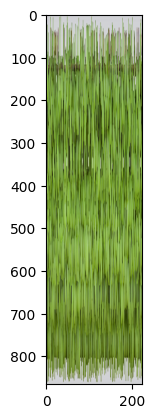

In [42]:
#ライブラリの読み込み
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

img_list=glob.glob(os.path.join("/content/cut_img/","*.jpg"))
# The issue was a typo.  'im_list' should be 'img_list'
img = cv2.imread(img_list[0]) #Corrected line
image_height,image_width=np.array(img).shape[:2]
img_bind=np.zeros((image_height, 1, 3), np.uint8)

for i in range(len(img_list)):
  img = cv2.imread(img_list[i])
  #指定した画素をimg_trimに代入
  img_trim = img[0:image_height,int(image_width/2)-1:int(image_width/2)]
  #色を変更
  img_trim = cv2.cvtColor(img_trim, cv2.COLOR_BGR2RGB)
  img_bind = cv2.hconcat([img_bind, img_trim])

#表示
plt.imshow(img_bind)
plt.show()